In [824]:
# Importing libraries
#Importing the Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Importing Warning Library
import warnings
#Importing Logging Library
import logging
warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO, filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filename='British_Airways_Improved.log', force=True)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

# Load dataset
logging.info('Dataset Imported Successfully')

In [825]:
logging.info('Importing The Dataset')

In [826]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df = df.sample(frac=1,random_state=42)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
33553,2,Internet,RoundTrip,47,4,15,Thu,KIXSIN,Japan,1,1,0,7.00,0
9427,1,Mobile,RoundTrip,46,85,14,Mon,DMKOOL,Thailand,1,1,0,8.83,0
199,1,Internet,RoundTrip,132,20,9,Mon,AKLKUL,Slovakia,1,0,0,8.83,0
12447,1,Internet,RoundTrip,58,18,23,Mon,HNDKTM,Japan,1,1,1,7.57,0
39489,2,Internet,RoundTrip,50,5,5,Thu,ICNSIN,China,1,0,0,6.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,91,11,Fri,HANSYD,Vietnam,1,0,1,8.58,0
44732,1,Internet,RoundTrip,65,6,18,Wed,DMKMRU,Mauritius,1,1,1,7.42,0
38158,2,Mobile,RoundTrip,107,5,6,Tue,HKTHND,Thailand,1,0,0,7.57,1
860,4,Internet,RoundTrip,232,19,8,Tue,AKLKUL,New Zealand,0,0,0,8.83,0


In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 33553 to 15795
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.7+ M

- `num_passengers` = number of passengers travelling
- `sales_channel` = How the Booking was Made
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = How many days in advance the booking was made before the flight
- `length_of_stay` = How many days the traveller plans to stay at their destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = The Flight Route - For Eg, AKLDEL : Auckland to Delhi
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [828]:
# Save unique dropdown options for route and origin
unique_routes = df['route'].unique().tolist()
unique_origins = df['booking_origin'].unique().tolist()

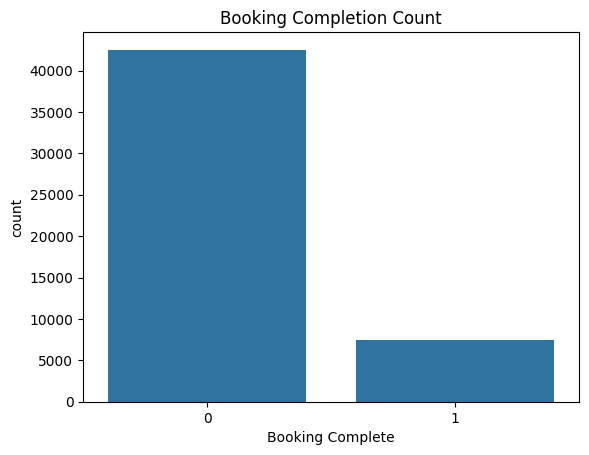

In [829]:
sns.countplot(x='booking_complete',data=df)
plt.title('Booking Completion Count')
plt.xlabel('Booking Complete')
plt.show()
# Whether users are more likely to abandon or complete the booking

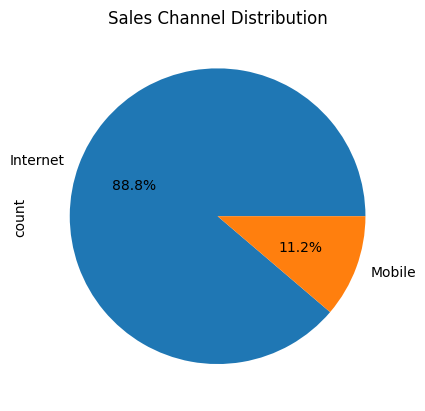

In [830]:
df['sales_channel'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales Channel Distribution')
plt.show()
#Most Preferred Platform of Users

Text(0.5, 1.0, 'Trip Type Distribution')

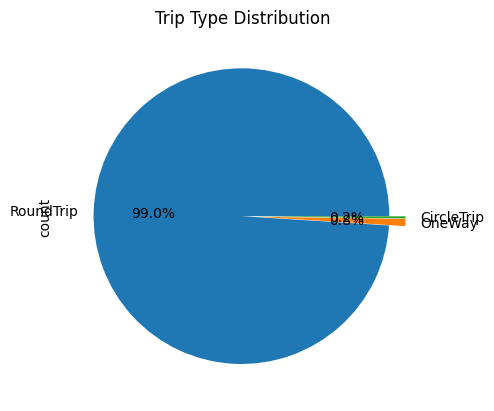

In [831]:
df['trip_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.01,0.1,0.1])
plt.title('Trip Type Distribution')
#Tells about the customer travel behaviour

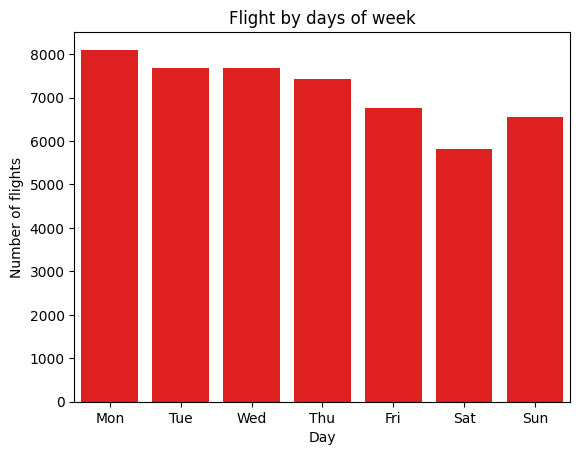

In [832]:
sns.countplot(x='flight_day',data=df,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],color='red')
plt.title('Flight by days of week')
plt.xlabel('Day')
plt.ylabel('Number of flights')
plt.show()
#high flight activity on weeknds may indicate the leisure travel

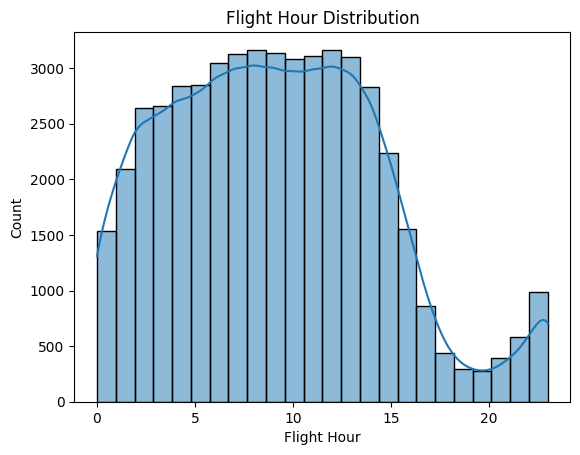

In [833]:
# 5. Histogram: Flight Hour
sns.histplot(df['flight_hour'], bins=24, kde=True)
plt.title("Flight Hour Distribution")
plt.xlabel("Flight Hour")
plt.ylabel("Count")
plt.show()
#Peak Travel Hours(eg, morning vs evening)

Text(0.5, 1.0, 'Wants Extra Baggage')

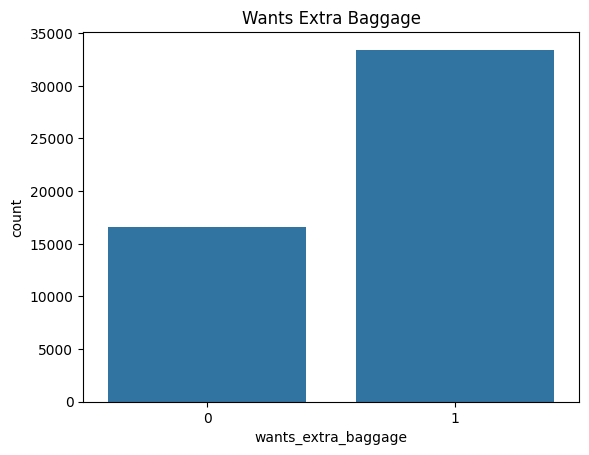

In [834]:
sns.countplot(x='wants_extra_baggage',data=df)
plt.title('Wants Extra Baggage')

Text(0.5, 1.0, 'Wants Preffered Seat')

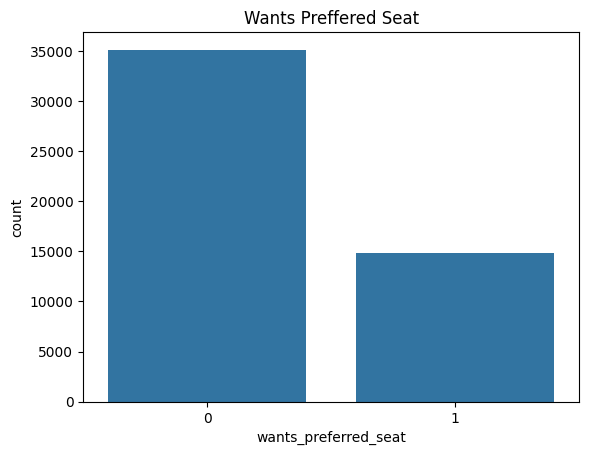

In [835]:
sns.countplot(x='wants_preferred_seat',data=df)
plt.title('Wants Preffered Seat')

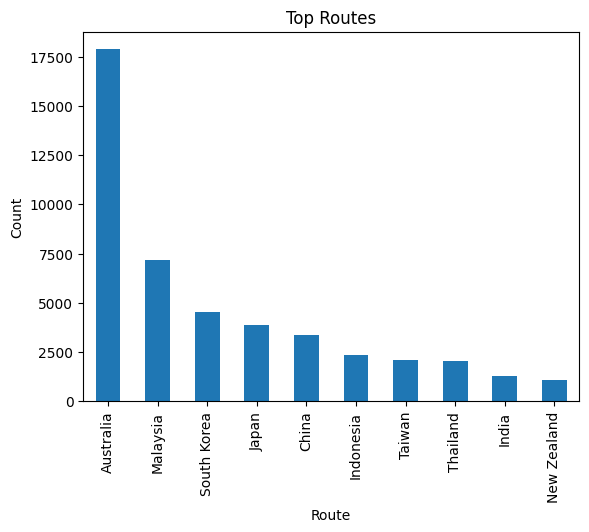

In [836]:
df['booking_origin'].value_counts().head(10).plot(kind='bar')
plt.title('Top Routes')
plt.xlabel('Route')
plt.ylabel('Count')
plt.show()
#Top Source Markets

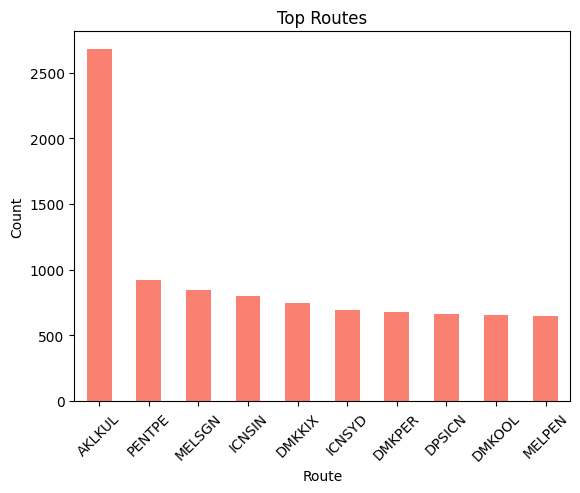

In [837]:
# 10. Bar Plot: Route
top_routes = df['route'].value_counts().head(10)
top_routes.plot(kind='bar', color='salmon')
plt.title("Top Routes")
plt.xlabel("Route")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
#Popular Routes

In [838]:
#Segregating the Numerical Column from the dataset
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

In [839]:
from collections import OrderedDict

stats = []

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    stats.append(OrderedDict({
        'Feature': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Q1': df[col].quantile(0.25),
        'Q3': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
        'Max': df[col].max(),
        'Min': df[col].min(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt(),
        'Variance': df[col].var()
    }))

report = pd.DataFrame(stats)

# Outlier flag
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    outlier_label.append('Has Outliers' if not outliers.empty else 'No Outliers')

report['Outlier Comment'] = outlier_label
report


,Feature,Mean,Median,Q1,Q3,IQR,Max,Min,Skewness,Kurtosis,Variance,Outlier Comment
0,num_passengers,1.591240,1.00,1.00,2.00,1.00,9.0,1.00,2.690908,10.062131,1.040736,Has Outliers
1,purchase_lead,84.940480,51.00,21.00,115.00,94.00,867.0,0.00,1.653035,2.486702,8181.451806,Has Outliers
2,length_of_stay,23.044560,17.00,5.00,28.00,23.00,778.0,0.00,5.274743,48.810238,1148.374182,Has Outliers
3,flight_hour,9.066340,9.00,5.00,13.00,8.00,23.0,0.00,0.396623,-0.302438,29.296885,No Outliers
4,wants_extra_baggage,0.668780,1.00,0.00,1.00,1.00,1.0,0.00,-0.717239,-1.485627,0.221518,No Outliers
5,wants_preferred_seat,0.296960,0.00,0.00,1.00,1.00,1.0,0.00,0.888762,-1.210150,0.208779,No Outliers
6,wants_in_flight_meals,0.427140,0.00,0.00,1.00,1.00,1.0,0.00,0.294593,-1.913291,0.244696,No Outliers
7,flight_duration,7.277561,7.57,5.62,8.83,3.21,9.5,4.67,-0.360080,-1.373927,2.240599,No Outliers
8,booking_complete,0.149560,0.00,0.00,0.00,0.00,1.0,0.00,1.965292,1.862448,0.127194,Has Outliers



📌 1. User Booking Behavior

    Most people book flights for just one person, sometimes two. Group bookings are rare.

    On average, people book their flights about 85 days in advance, but some book extremely early — even over 850 days ahead.

    The length of stay for most travelers is between 1 to 4 weeks, though a few have unusually long stays, going up to 778 days.

    A very important insight: only 15% of users actually complete their booking. This means there’s a high drop-off rate, which could be a key area to focus on for business improvement.

📌 2. Flight Details

    Most flights are scheduled around 9 AM, so morning flights are the most common.

    The flight duration is almost always around 7.3 hours, which makes sense as the route is fixed — from Auckland (AKL) to Delhi (DEL).

📌 3. User Preferences

    About 67% of users want extra baggage — this is the most popular add-on service.

    Around 43% want in-flight meals, and only 30% prefer selecting a seat.

    So, extra baggage is a good opportunity for upselling.

📌 4. Statistical Observations

    Some features like purchase lead and length of stay have extreme outliers and are heavily skewed to the right.

    Other features like flight hour and user preferences are more balanced and normally distributed.



In [840]:
#Skewness tells us how the data is distributed around the mean. it show
#whether the data is symmetrical or titled to one side

#Kurtosis tells how peaked or flat the data distribution is, it measures the
#presence of extreme value or outliers in the data

In [841]:
logging.info('Checking Variance Inflation Rate')

In [842]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['int64', 'float64'])

    # Drop constant columns
    constant_cols = [col for col in numeric_data.columns if numeric_data[col].nunique() == 1]
    numeric_data = numeric_data.drop(columns=constant_cols)

    vif = pd.DataFrame()
    vif["Feature"] = numeric_data.columns
    vif["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif.sort_values(by="VIF", ascending=False)


calculate_vif(df.drop(columns=['booking_complete']))

,Feature,VIF
7,flight_duration,7.325369
3,flight_hour,3.482256
0,num_passengers,3.426906
4,wants_extra_baggage,3.304088
6,wants_in_flight_meals,2.028739
1,purchase_lead,1.998293
5,wants_preferred_seat,1.621790
2,length_of_stay,1.574157


In [843]:
logging.info('Performing Feature Engineering')

In [844]:
# Feature engineering
def hour_bin(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

df['stay_per_passenger'] = df['length_of_stay'] / (df['num_passengers'] + 1)
df['lead_time_ratio'] = df['purchase_lead'] / (df['length_of_stay'] + 1)
df['is_weekend_flight'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)
df['flight_period'] = df['flight_hour'].apply(hour_bin)



## **stay_per_passenger**

    Measures the average stay duration per passenger.
    Purpose: Normalizes trip duration based on group size.

## **lead_time_ratio**

    Ratio of how early a flight is booked relative to trip length.
    Purpose: Captures planning behavior — e.g., early bookings for short stays may suggest business travel.

## **is_weekend_flight**

    Flags if the flight is on a weekend (Saturday or Sunday).
    Purpose: Helps distinguish between leisure and business travelers.

## **flight_period**

    Categorizes flight times into morning, afternoon, or night based on flight hour.
    Purpose: Understands traveler preferences for time of day.

In [845]:
logging.info('Capping Outliers')

In [846]:
# CRITICAL: Outlier treatment BEFORE train-test split (as in original)
def replace_outliers_with_median(data, exclude_cols=['booking_complete']):
    for col in data.select_dtypes(include='number').columns:
        if col not in exclude_cols:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
            if outliers.sum() > 0:
                replacement = data[col].median()
                data.loc[outliers, col] = replacement
                print(f"Replaced {outliers.sum()} outliers in '{col}' with median")
    return data

df = replace_outliers_with_median(df)
df

Replaced 2903 outliers in 'num_passengers' with median
Replaced 3456 outliers in 'purchase_lead' with median
Replaced 3807 outliers in 'length_of_stay' with median
Replaced 4114 outliers in 'stay_per_passenger' with median
Replaced 5358 outliers in 'lead_time_ratio' with median


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,stay_per_passenger,lead_time_ratio,is_weekend_flight,flight_period
33553,2,Internet,RoundTrip,47,4,15,Thu,KIXSIN,Japan,1,1,0,7.00,0,1.333333,9.400000,0,afternoon
9427,1,Mobile,RoundTrip,46,17,14,Mon,DMKOOL,Thailand,1,1,0,8.83,0,4.000000,0.534884,0,afternoon
199,1,Internet,RoundTrip,132,20,9,Mon,AKLKUL,Slovakia,1,0,0,8.83,0,10.000000,6.285714,0,morning
12447,1,Internet,RoundTrip,58,18,23,Mon,HNDKTM,Japan,1,1,1,7.57,0,9.000000,3.052632,0,night
39489,2,Internet,RoundTrip,50,5,5,Thu,ICNSIN,China,1,0,0,6.62,0,1.666667,8.333333,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,17,11,Fri,HANSYD,Vietnam,1,0,1,8.58,0,4.000000,0.217391,0,morning
44732,1,Internet,RoundTrip,65,6,18,Wed,DMKMRU,Mauritius,1,1,1,7.42,0,3.000000,9.285714,0,night
38158,2,Mobile,RoundTrip,107,5,6,Tue,HKTHND,Thailand,1,0,0,7.57,1,1.666667,17.833333,0,morning
860,1,Internet,RoundTrip,232,19,8,Tue,AKLKUL,New Zealand,0,0,0,8.83,0,3.800000,11.600000,0,morning


In [847]:
categorical_columns = df.select_dtypes(include='object')
print("Categorical columns to encode:", categorical_columns.columns.tolist())

Categorical columns to encode: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'flight_period']


In [848]:
logging.info('Applying the Label Encoder to Categorical Columns')

In [849]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'booking_complete':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded column: {col}")

# Verify no object columns remain (except target if it's supposed to be object)
print("\nData types after encoding:")
print(df.dtypes)

Encoded column: sales_channel
Encoded column: trip_type
Encoded column: flight_day
Encoded column: route
Encoded column: booking_origin
Encoded column: flight_period

Data types after encoding:
num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
stay_per_passenger       float64
lead_time_ratio          float64
is_weekend_flight          int64
flight_period              int64
dtype: object


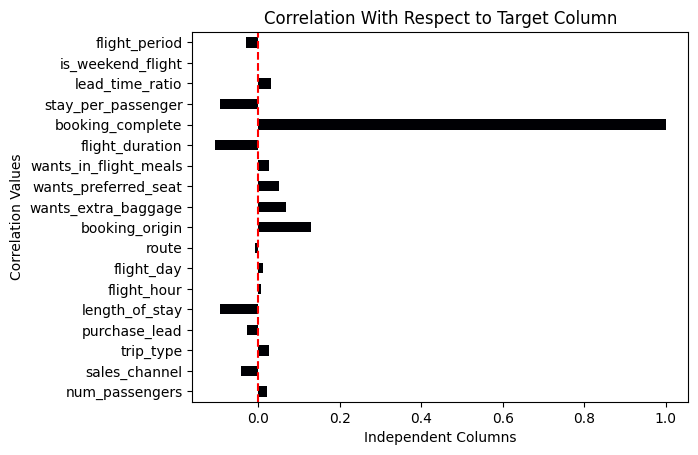

In [850]:
#This Graph shows the correlation of all the columns with respect to target column
df.corr()['booking_complete'].plot(kind='barh',cmap='magma')
plt.axvline(0,linestyle='--',color='red')
plt.title('Correlation With Respect to Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

In [ ]:
#Dropped the route feature: 
#All the data seem to have the same route Auckland to Delhi, so this column has no variation
#every rows provides zero information to the model

#Dropped Booking Origin
# One country (like Australia) has most of the bookings — over 17,500.
# Other countries have very few bookings in comparison.
# This creates imbalance, which can mislead the model.
#The model may focus too much on that one country and ignore important patterns.

In [851]:
# Prepare features and target (same feature selection as original)
X = df.drop(columns=['booking_complete', 'route', 'booking_origin'], errors='ignore',axis = 1)
y = df['booking_complete']

In [852]:
logging.info('Splitting the Dataset in train test split')

In [853]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set class distribution:")
y_train.value_counts()

Training set class distribution:


booking_complete
0    29765
1     5235
Name: count, dtype: int64

In [854]:
logging.info('Applying Smote Technique')

In [855]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [856]:
y_train.value_counts()

booking_complete
0    29765
1    29765
Name: count, dtype: int64

In [857]:
logging.info('Scaling the Features')

In [858]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [859]:
logging.info('Training the Model')

In [860]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

CBC = CatBoostClassifier(verbose=False).fit(X_train,y_train)
y_pred_CBC = CBC.predict(X_test)
print("The Catboost Classifier Accuracy:", round(accuracy_score(y_test, y_pred_CBC) * 100, 2), "%")

The Catboost Classifier Accuracy: 84.31 %


In [861]:
logging.info('Model Training Done....')

In [862]:
accuracy = accuracy_score(y_test, y_pred_CBC)
logging.info("The Model Accuracy After Training: %.2f%%", accuracy * 100)

In [863]:
# import joblib

# joblib.dump(CBC,'catboost_model.pkl')
# print("Catboost Model saved as 'catboost_model.pkl'")

In [864]:
# joblib.dump(sc,'scaler.pkl')
# print("Scaler saved as 'scaler.pkl'")

In [865]:
# # Save final training feature columns
# joblib.dump(X.columns.tolist(), 'feature_names.pkl')

In [866]:
# label_encoders = {}

# categorical_columns = df.select_dtypes(include=['object']).columns

# for col in categorical_columns:
#     if col != 'booking_complete':
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col])
#         label_encoders[col] = le
#         print(f'Encoder trained and saved for column: {col}')


# joblib.dump(label_encoders, 'encoders.pkl')
# print("All Encoders saves as 'encoders.pkl")

In [867]:
# import gradio as gr
# import numpy as np
# import pandas as pd
# import pickle
# import joblib
# from catboost import CatBoostClassifier
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# import warnings
# warnings.filterwarnings('ignore')

# # Load the trained model and scaler
# CBC = joblib.load('catboost_model.pkl')
# sc = joblib.load('scaler.pkl')

# def hour_bin(hour):
#     if 5 <= hour < 12:
#         return 'morning'
#     elif 12 <= hour < 18:
#         return 'afternoon'
#     else:
#         return 'night'

# def predict_booking(sales_channel, purchase_lead, length_of_stay, flight_hour, 
#                    flight_day, wants_extra_baggage, wants_preferred_seat, 
#                    wants_in_flight_meals, flight_duration):
#     try:
#         # Create feature engineering
#         stay_per_passenger = length_of_stay / 2  # Assuming average 1 additional passenger
#         lead_time_ratio = purchase_lead / (length_of_stay + 1)
#         is_weekend_flight = 1 if flight_day in ['Saturday', 'Sunday'] else 0
#         flight_period = hour_bin(flight_hour)
        
#         # Encode categorical variables (you'll need to use the same encoding as training)
#         # For demo, using simple mapping - replace with your actual label encoders
#         sales_channel_map = {'Internet': 0, 'Mobile': 1}
#         flight_day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
#                          'Friday': 4, 'Saturday': 5, 'Sunday': 6}
#         flight_period_map = {'morning': 0, 'afternoon': 1, 'night': 2}
        
#         sales_channel_encoded = sales_channel_map.get(sales_channel, 0)
#         flight_day_encoded = flight_day_map.get(flight_day, 0)
#         flight_period_encoded = flight_period_map.get(flight_period, 0)
    
        
#         features = np.array([[
#             sales_channel_encoded,
#             purchase_lead,
#             length_of_stay,
#             flight_hour,
#             flight_day_encoded,
#             int(wants_extra_baggage),
#             int(wants_preferred_seat),
#             int(wants_in_flight_meals),
#             flight_duration,
#             stay_per_passenger,
#             lead_time_ratio,
#             is_weekend_flight,
#             flight_period_encoded
#         ]])
        
#         # Scale features
#         if sc is not None:
#             features_scaled = sc.transform(features)
#         else:
#             features_scaled = features
            
#         # Make prediction
#         if CBC is not None:
#             prediction = CBC.predict(features_scaled)[0]
#             probability = CBC.predict_proba(features_scaled)[0]
            
#             result = "Will Complete Booking" if prediction == 1 else "Will Not Complete Booking"
#             confidence = f"Confidence: {max(probability):.2%}"
            
#             return f"{result}\n{confidence}"
#         else:
#             return "Model not loaded. Please train and save your model first."
            
#     except Exception as e:
#         return f"Error in prediction: {str(e)}"

# # Create Gradio interface
# def create_gradio_app():
#     with gr.Blocks(title="British Airways Booking Prediction", theme=gr.themes.Soft()) as app:
        
#         gr.Markdown("""
#         # 🛫 British Airways Booking Prediction
        
#         Predict whether a customer will complete their booking based on various factors.
#         """)
        
#         with gr.Row():
#             with gr.Column():
#                 gr.Markdown("### Flight Details")
                
#                 sales_channel = gr.Dropdown(
#                     choices=["Internet", "Mobile"],
#                     label="Sales Channel",
#                     value="Internet"
#                 )
                
#                 flight_day = gr.Dropdown(
#                     choices=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
#                     label="Flight Day",
#                     value="Monday"
#                 )
                
#                 flight_hour = gr.Slider(
#                     minimum=0,
#                     maximum=23,
#                     step=1,
#                     label="Flight Hour (24-hour format)",
#                     value=12
#                 )
                
#                 flight_duration = gr.Number(
#                     label="Flight Duration (hours)",
#                     value=2.5,
#                     minimum=0.5,
#                     maximum=15
#                 )
                
#             with gr.Column():
#                 gr.Markdown("### Booking Details")
                
#                 purchase_lead = gr.Number(
#                     label="Purchase Lead Time (days)",
#                     value=30,
#                     minimum=0,
#                     maximum=365
#                 )
                
#                 length_of_stay = gr.Number(
#                     label="Length of Stay (days)",
#                     value=7,
#                     minimum=1,
#                     maximum=30
#                 )
                
#                 wants_extra_baggage = gr.Checkbox(
#                     label="Wants Extra Baggage",
#                     value=False
#                 )
                
#                 wants_preferred_seat = gr.Checkbox(
#                     label="Wants Preferred Seat",
#                     value=False
#                 )
                
#                 wants_in_flight_meals = gr.Checkbox(
#                     label="Wants In-Flight Meals",
#                     value=False
#                 )
        
#         predict_btn = gr.Button("Predict Booking Completion", variant="primary", size="lg")
        
#         with gr.Row():
#             output = gr.Textbox(
#                 label="Prediction Result",
#                 placeholder="Click 'Predict Booking Completion' to see the result",
#                 lines=3
#             )
        
#         # Connect the prediction function
#         predict_btn.click(
#             fn=predict_booking,
#             inputs=[
#                 sales_channel, purchase_lead, length_of_stay, flight_hour,
#                 flight_day, wants_extra_baggage, wants_preferred_seat,
#                 wants_in_flight_meals, flight_duration
#             ],
#             outputs=output
#         )
        
#         gr.Markdown("""
#         ### Instructions:
#         1. Fill in the flight and booking details above
#         2. Click 'Predict Booking Completion' to get the prediction
#         3. The model will predict whether the customer will complete the booking
        
#         **Note**: Make sure you have trained and saved your CatBoost model and MinMaxScaler before running this app.
#         """)
    
#     return app

# # Complete training and model saving code
# def train_and_save_model():
#     """
#     Complete training pipeline - run this first to create the saved model files
#     """
#     print("Add your complete training code here and uncomment the joblib.save lines above")
#     print("Make sure to save both the model and scaler:")
#     print("joblib.dump(CBC, 'catboost_model.pkl')")
#     print("joblib.dump(sc, 'scaler.pkl')")

# if __name__ == "__main__":
#     # Uncomment this line after you've saved your trained model
#     app = create_gradio_app()
#     app.launch()